In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_error, mean_squared_error

In [33]:
df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/diamond_pricing.csv')

In [34]:
df

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339
...,...,...,...
995,90,15039,1633.608018
996,49,10592,2316.189728
997,42,18435,1189.359047
998,10,13675,2922.682785


In [36]:
px.scatter_3d(df,x='Paleonium',y='Pressure',z='Price',color='Price')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Paleonium=%{x}<br>Pressure=%{y}<br>Price=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([2810.280298, 1986.967089, 2083.132087, ..., 1189.359047, 2922.682785,
                                         1469.549379]),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': array([ 17,  59, 123, ...,  42,  10,  54], dtype=int64),
              'y': array([ 6567,  5253,  9715, ..., 18435, 13675, 16996], dtype=int64),
              'z': array([2810.280298, 1986.967089, 2083.132087, ..., 1189.359047, 2922.682785,
                          1469.549379])}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Price'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'Paleonium'}},
                         'yaxis': {'title': {'text': 'Pressure'}},
                         'zaxis': {'title': {'text': 'Price'}}},
               'template': '...'}
})

In [ ]:
x=df[['Paleonium','Pressure']]
y=df['Price']

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [50]:
model=DecisionTreeRegressor(max_depth=20)
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=20)

In [52]:
print("Score:",model.score(xtest,ytest)*100)

Score: 94.86549366216643


In [ ]:
pred=model.predict(x)
print("Mean Absolute Error:",mean_absolute_error(y,pred))
print("Mean Squared Error:",mean_squared_error(y,pred))

Mean Absolute Error: 19.289912050900003
Mean Squared Error: 3221.8180714378373


<AxesSubplot:ylabel='Density'>

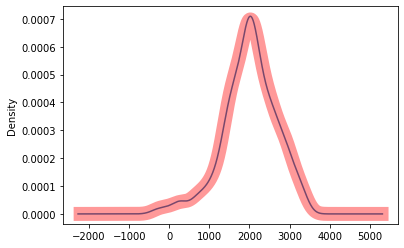

In [ ]:
df['p1']=pred
ax=df['Price'].plot(kind='kde')
df['p1'].plot(kind='kde',ax=ax,alpha=0.4,color='red',linewidth=14)

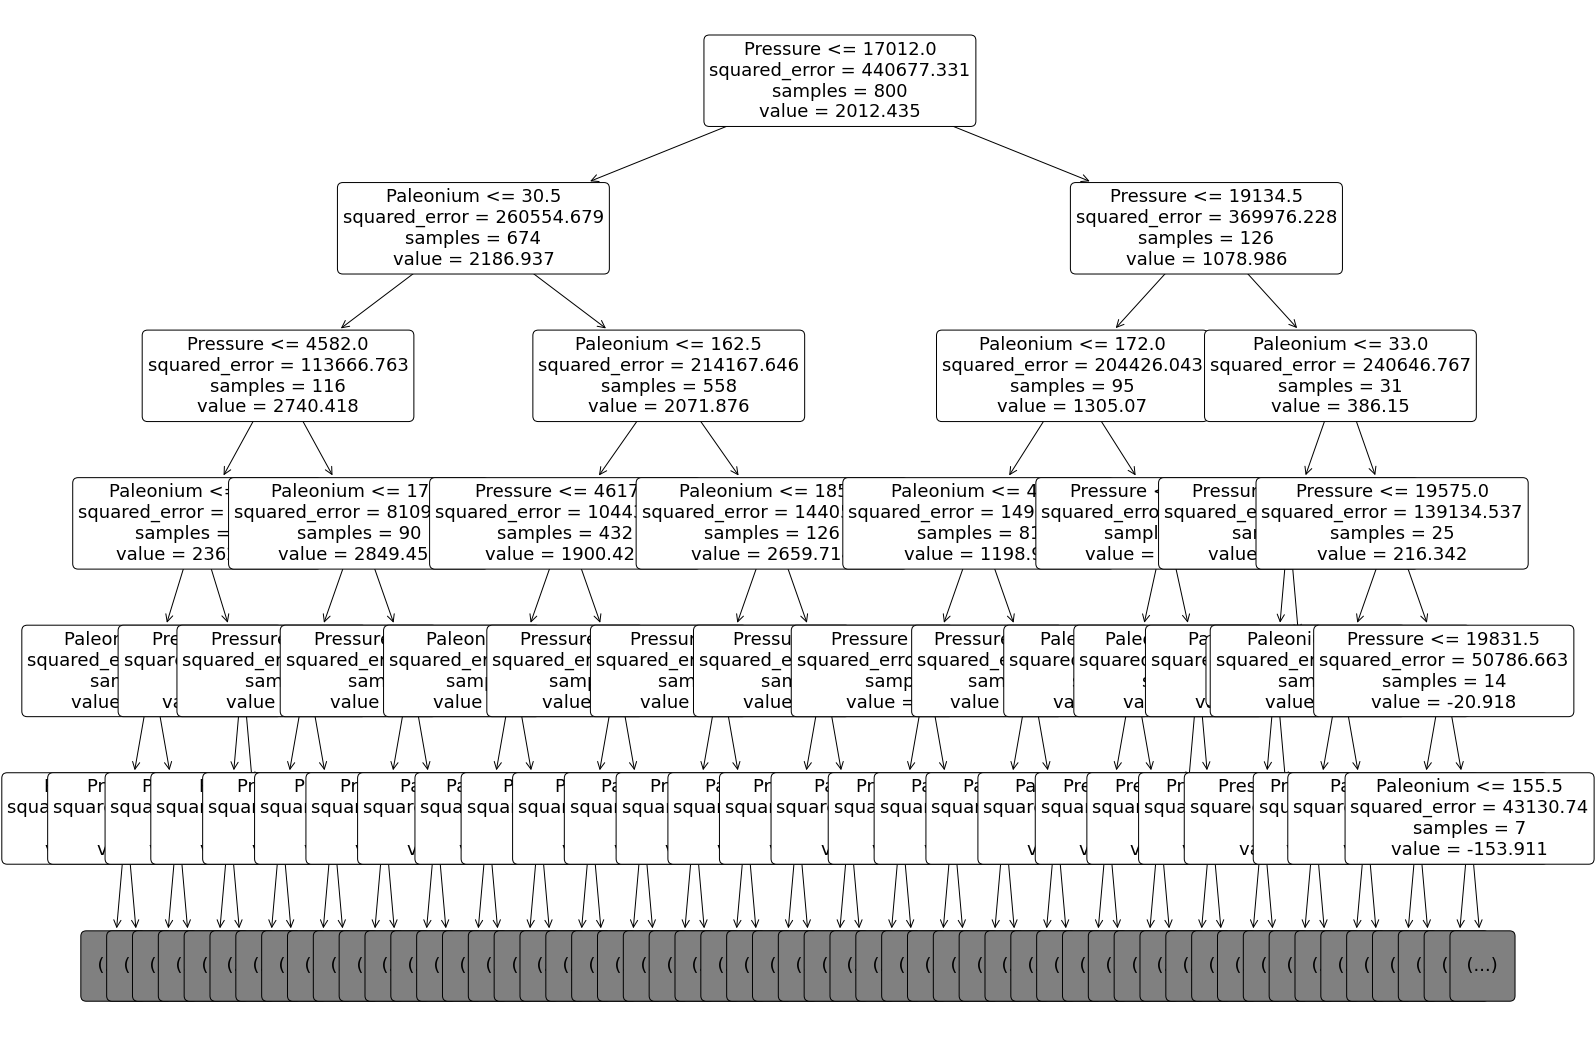

In [59]:
plt.figure(figsize=(25,19))
plot_tree(model,max_depth=5,fontsize=18,feature_names=['Paleonium','Pressure'],rounded=True)
plt.show()